Wait a minute... what if we use our big catalog of known EBs to pick:
# Known EBs already in TESS

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from astropy.table import Table
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm

from glob import glob

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
# matplotlib.rcParams.update({'font.family':'serif'})

# for the TESS Science Online 48hr sprint, we'll be using Cyberpunk for the graphics!
# https://github.com/dhaitz/mplcyberpunk
import mplcyberpunk
plt.style.use("cyberpunk")

In [3]:
knownEBs = pd.read_csv('BigCat.csv')

knownEBs.columns

Index(['Unnamed: 0', 'source_id', 'ra', 'dec', 'bp_rp', 'parallax',
       'phot_g_mean_mag', 'Per'],
      dtype='object')

In [4]:
# the TESS-Gaia xmatch from Trevor
gdir = '/Users/james/Dropbox/research_projects/TESS-Gaia/'
gfiles = glob(gdir+'*1arsec-result.csv')
gaia = pd.concat((pd.read_csv(f) for f in gfiles), ignore_index=True, sort=False)


Index(['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch',
       'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       ...
       'tess_sector22_oid', 'tess_sector15_oid', 'tess_sector19_oid',
       'tess_sector23_oid', 'tess_sector14_oid', 'tess_sector10_oid',
       'tess_sector27_oid', 'tess_sector18_oid', 'tess_sector2_oid',
       'tess_sector6_oid'],
      dtype='object', length=138)

In [49]:
look = knownEBs.merge(gaia, right_on='source_id', left_on='source_id', how='inner')
look.rename(columns={'bp_rp_x':'bp_rp','phot_g_mean_mag_x':'phot_g_mean_mag', 
                       'parallax_x':'parallax', 'teff_val_x':'teff_val', 'lum_val_x':'lum_val'}, 
              inplace=True)

In [50]:
look['ticid'].unique().size

320

In [51]:
look.shape

(771, 145)

In [52]:
EHow = pd.read_csv('EHow.csv')
Eok = ((EHow['parallax'] > 0) & 
       np.isfinite(EHow['bp_rp']) & 
       np.isfinite(EHow['phot_g_mean_mag']))

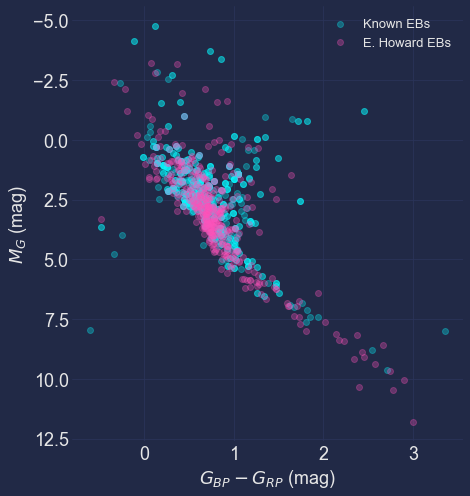

In [53]:
ok = ((look['parallax'] > 0) & 
       np.isfinite(look['bp_rp']) & 
       np.isfinite(look['phot_g_mean_mag']))

plt.figure(figsize=(7,8))

plt.scatter(look['bp_rp'][ok], 
           look['phot_g_mean_mag'][ok] - 5. * np.log10(1000./look['parallax'][ok]) + 5, 
            label='Known EBs', alpha=0.3)

plt.scatter(EHow['bp_rp'][Eok], 
            EHow['phot_g_mean_mag'][Eok] - 5. * np.log10(1000./EHow['parallax'][Eok]) + 5, 
            label='E. Howard EBs', alpha=0.3)

plt.legend(fontsize=13)
plt.gca().invert_yaxis()

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')
plt.grid(True)

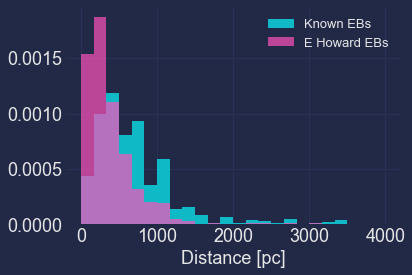

In [54]:
_ = plt.hist(1000./look['parallax'][ok], density=True, alpha=0.7, bins=np.linspace(0,4000,25), label='Known EBs')
_ = plt.hist(1000./EHow['parallax'][Eok], density=True, alpha=0.7, bins=np.linspace(0,4000,25), label='E Howard EBs')

plt.xlabel('Distance [pc]')
plt.legend(fontsize=13)

Text(0.5, 0, 'log$_{10}$ ($P_{orb}$ / days)')

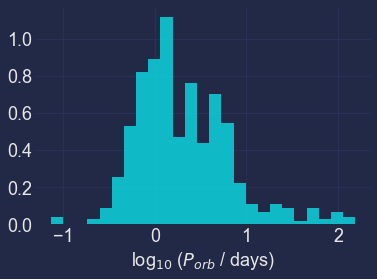

In [55]:
_ = plt.hist(np.log10(look['Per'][ok]), density=True, alpha=0.7,bins=25)
plt.xlabel('log$_{10}$ ($P_{orb}$ / days)')


In [56]:
both = pd.concat((look[['source_id', 'bp_rp', 'phot_g_mean_mag', 'parallax', 'teff_val', 'lum_val']].loc[ok], 
                  EHow[['source_id', 'bp_rp', 'phot_g_mean_mag', 'parallax', 'teff_val', 'lum_val']].loc[Eok]), 
                 ignore_index=True, sort=False)
both.to_csv('Erin_and_Known_EBs.csv')

In [57]:
both['source_id'].unique().size

702

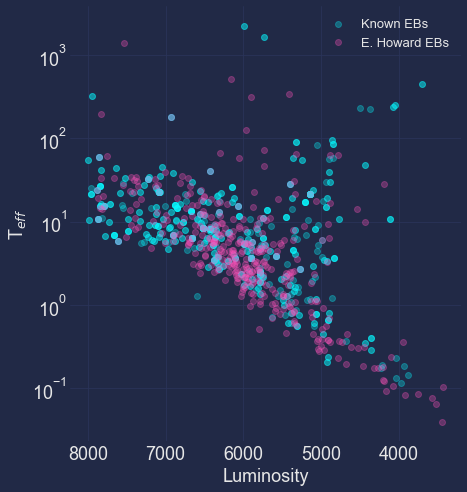

In [62]:
plt.figure(figsize=(7,8))

plt.scatter(look['teff_val'][ok], 
           look['lum_val'][ok], 
            label='Known EBs', alpha=0.3)

plt.scatter(EHow['teff_val'][Eok], 
            EHow['lum_val'][Eok],
            label='E. Howard EBs', alpha=0.3)

plt.legend(fontsize=13)
plt.yscale('log')
plt.gca().invert_xaxis()
plt.ylabel('Luminosity')
plt.xlabel('T$_{eff}$')
plt.grid(True)

(-1.0, 1.5)

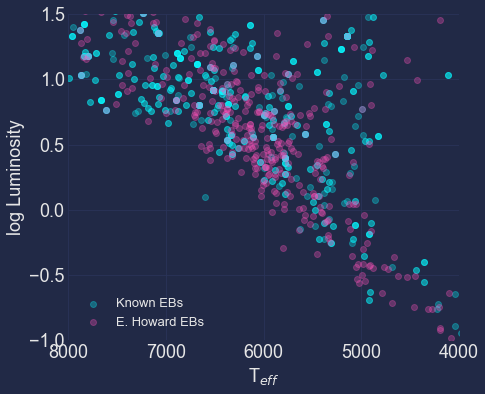

In [64]:
# roughly match Jamie Tayar's model-grid comparison figure
plt.figure(figsize=(7,6))

plt.scatter(look['teff_val'][ok], 
           np.log10(look['lum_val'][ok]), 
            label='Known EBs', alpha=0.3)

plt.scatter(EHow['teff_val'][Eok], 
            np.log10(EHow['lum_val'][Eok]),
            label='E. Howard EBs', alpha=0.3)

plt.legend(fontsize=13)
plt.gca().invert_xaxis()
plt.ylabel('log Luminosity')
plt.xlabel('T$_{eff}$')
plt.grid(True)
plt.xlim(8000,4000)
plt.ylim(-1,1.5)